# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


# Fine Tuning DistilBERT, MobileBERT and TinyBERT for Fake News Detection

## Text Classification Architecture

https://www.kaggle.com/c/fake-news/data

- Text classification is one of the most common tasks in NLP; it can be used for a broad range of applications, such as tagging customer feedback into categories or routing support tickets according to their language.

- smam classification, sentiment classification, toxic comment, emotion classification etc.


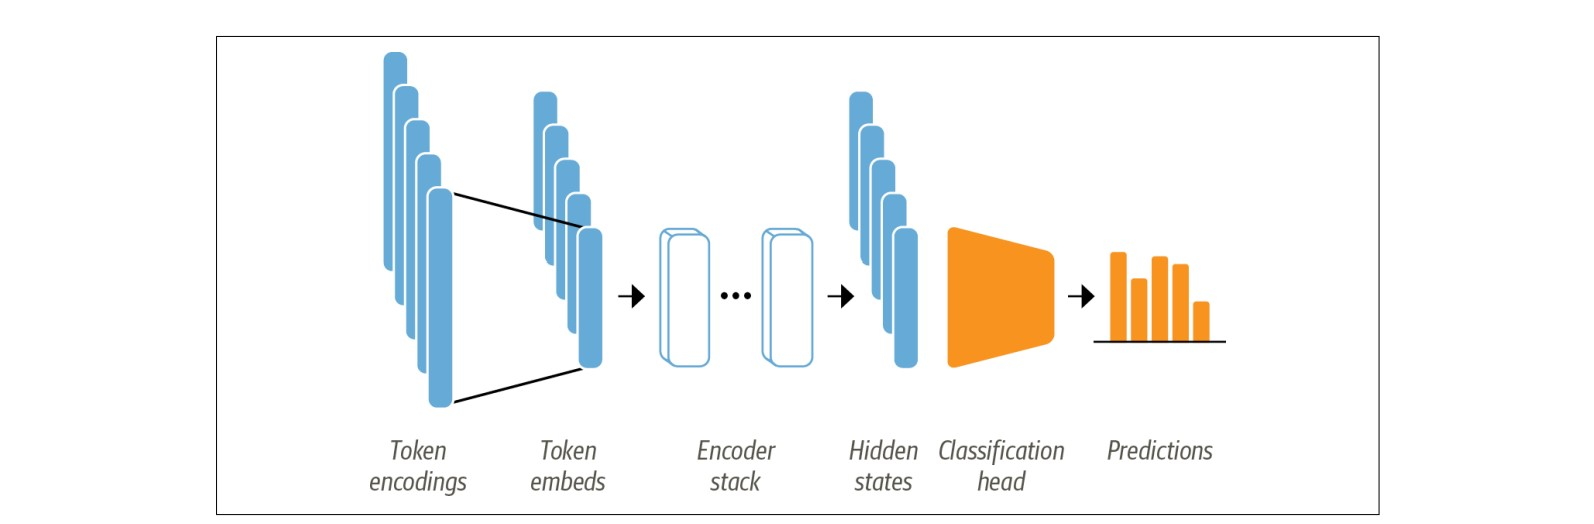

## Coding

In [1]:
# !pip install -U transformers
# !pip install -U accelerate
# !pip install -U datasets
# !pip install -U bertviz
# !pip install -U umap-learn
# !pip install seaborn --upgrade

# !pip install -U openpyxl

# Don't do in production. Doing now to keep output clean for understanding
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_excel("https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/fake_news.xlsx")

In [6]:
df.isnull().sum()
df = df.dropna()

df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
df.shape

df['label'].value_counts()

label
0    10361
1     7920
Name: count, dtype: int64

## Dataset Analysis

In [9]:
import matplotlib.pyplot as plt

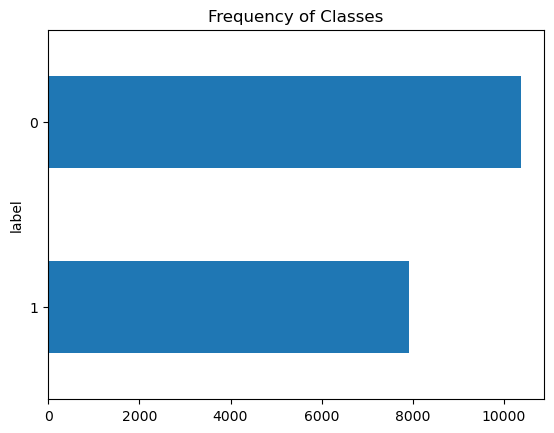

In [12]:
label_counts = df['label'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

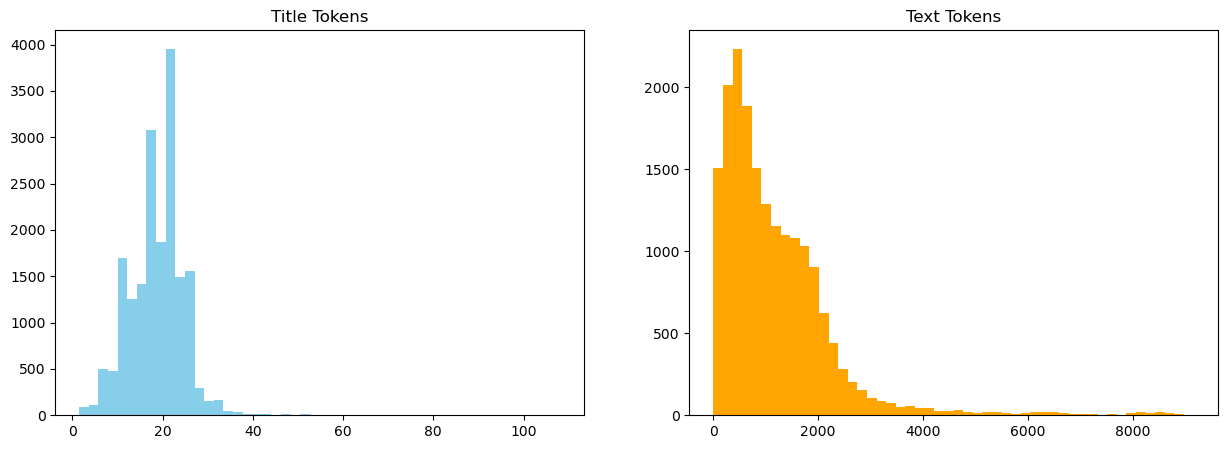

In [23]:
# 1.5 tokens per word on average
df['title_tokens'] = df['title'].apply(lambda x: len(x.split())*1.5)
df['text_tokens'] = df['text'].apply(lambda x: len(x.split())*1.5)


fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].hist(df['title_tokens'], bins=50, color = 'skyblue')
ax[0].set_title("Title Tokens")

ax[1].hist(df['text_tokens'], bins=50, color = 'orange')
ax[1].set_title("Text Tokens")

plt.show()

## Data Loader and Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

# 70% for training, 20% test, 10% validation
train, test = train_test_split(df, test_size=0.3, stratify=df['label'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['label'])

train.shape, test.shape, validation.shape, df.shape



((12796, 7), (3656, 7), (1829, 7), (18281, 7))

In [27]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
        "train": Dataset.from_pandas(train, preserve_index=False),
        "test": Dataset.from_pandas(test, preserve_index=False),
        "validation": Dataset.from_pandas(validation, preserve_index=False)
    }
)

dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 12796
    })
    test: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 3656
    })
    validation: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 1829
    })
})

## Data Tokenization

In [30]:
from transformers import AutoTokenizer

text = "Machine learning is awesome!! Thanks KGP Talkie."

model_ckpt = "distilbert-base-uncased"
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
distilbert_tokens = distilbert_tokenizer.tokenize(text)

model_ckpt = "google/mobilebert-uncased"
mobilebert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
mobilebert_tokens = mobilebert_tokenizer.tokenize(text)

model_ckpt = "huawei-noah/TinyBERT_General_4L_312D"
tinybert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tinybert_tokens = tinybert_tokenizer.tokenize(text)


In [31]:
distilbert_tokenizer, mobilebert_tokenizer, tinybert_tokenizer

(DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
 	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 },
 MobileBertTokenizerFast(name_or_path='google/mobilebert-uncased', vocab_size=30522, model_max_length=10000

In [36]:
def tokenize(batch):
    temp = distilbert_tokenizer(batch['title'], padding=True, truncation=True)
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 3803, 3789, 3427, 2408, 2885, 2007, 1037, 4344, 1999, 1996, 3612, 1011, 1996, 2047, 2259, 2335, 102, 0, 0, 0], [101, 7738, 1999, 2358, 1012, 8062, 1010, 3607, 1010, 8563, 2340, 2004, 8748, 22072, 7879, 1011, 1996, 2047, 2259, 2335, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [37]:
encoded_dataset = dataset.map(tokenize, batch_size=None, batched=True)

Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

## Model Building

In [50]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import torch

label2id = {"Real": 0, "Fake": 1}
id2label = {0:"Real", 1:"Fake"}

model_ckpt = "distilbert-base-uncased"
# model_ckpt = "google/mobilebert-uncased"
# model_ckpt = "huawei-noah/TinyBERT_General_4L_312D"


num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)




Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
model.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "Real",
    "1": "Fake"
  },
  "initializer_range": 0.02,
  "label2id": {
    "Fake": 1,
    "Real": 0
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.35.2",
  "vocab_size": 30522
}

## Model Fine-Tuning

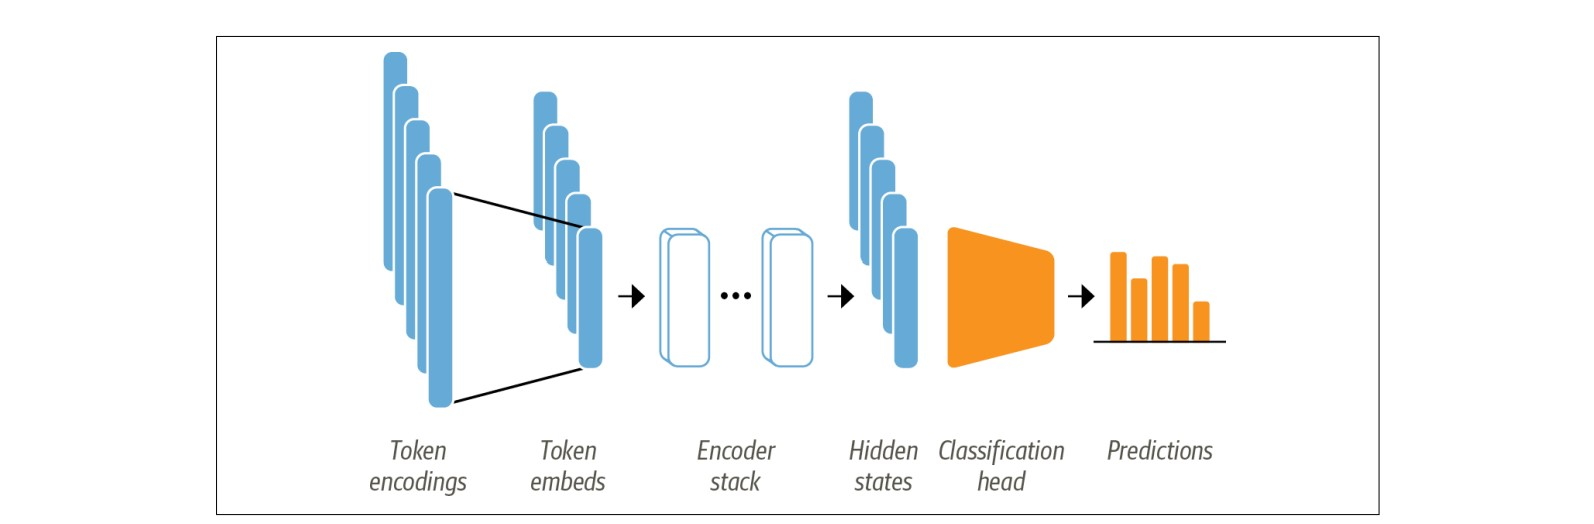

- `AutoModelForSequenceClassification` model has a classification head on top of the pretrained model outputs

- The first thing we need is a pretrained BERT-like model.
- The only slight modification is that we use the `AutoModelForSequenceClassification` model instead of AutoModel.
- The difference is that the `AutoModelForSequenceClassification` model has a classification head on top of the pretrained model outputs, which can be easily trained with the base model.

#### Evaluator

https://huggingface.co/docs/transformers/v4.42.0/en/tasks/sequence_classification#evaluate

In [53]:
# Build compute metrics function
# !pip install evaluate
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [54]:
from transformers import TrainingArguments

batch_size = 32
training_dir = "train_dir"

training_args = TrainingArguments(
                                  output_dir=training_dir,
                                  overwrite_output_dir = True,
                                  num_train_epochs = 2,
                                  learning_rate = 2e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  weight_decay = 0.01,
                                  evaluation_strategy = 'epoch'
)



In [56]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    compute_metrics=compute_metrics_evaluate,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['validation'],
    tokenizer=distilbert_tokenizer
)

In [58]:
trainer.train()

  0%|          | 0/4800 [00:00<?, ?it/s]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 0.2132, 'learning_rate': 4.4791666666666673e-05, 'epoch': 0.31}
{'loss': 0.1734, 'learning_rate': 3.958333333333333e-05, 'epoch': 0.62}
{'loss': 0.1512, 'learning_rate': 3.4375e-05, 'epoch': 0.94}
{'loss': 0.0764, 'learning_rate': 2.916666666666667e-05, 'epoch': 1.25}
{'loss': 0.0823, 'learning_rate': 2.3958333333333334e-05, 'epoch': 1.56}
{'loss': 0.0691, 'learning_rate': 1.8750000000000002e-05, 'epoch': 1.88}
{'loss': 0.0472, 'learning_rate': 1.3541666666666666e-05, 'epoch': 2.19}
{'loss': 0.0232, 'learning_rate': 8.333333333333334e-06, 'epoch': 2.5}
{'loss': 0.0335, 'learning_rate': 3.125e-06, 'epoch': 2.81}
{'train_runtime': 363.4127, 'train_samples_per_second': 105.632, 'train_steps_per_second': 13.208, 'train_loss': 0.09221653908491134, 'epoch': 3.0}


TrainOutput(global_step=4800, training_loss=0.09221653908491134, metrics={'train_runtime': 363.4127, 'train_samples_per_second': 105.632, 'train_steps_per_second': 13.208, 'train_loss': 0.09221653908491134, 'epoch': 3.0})

## Model Evaluation

In [59]:
preds_output = trainer.predict(encoded_dataset['test'])


  0%|          | 0/457 [00:00<?, ?it/s]

In [61]:
preds_output.metrics

{'test_loss': 0.19827575981616974,
 'test_accuracy': 0.9595185995623632,
 'test_runtime': 9.4297,
 'test_samples_per_second': 387.713,
 'test_steps_per_second': 48.464}

In [64]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = encoded_dataset['test'][:]['label']

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=list(label2id)))

              precision    recall  f1-score   support

        Real       0.97      0.96      0.96      2072
        Fake       0.95      0.96      0.95      1584

    accuracy                           0.96      3656
   macro avg       0.96      0.96      0.96      3656
weighted avg       0.96      0.96      0.96      3656



## Benchmarking

In [66]:
# use sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}

In [70]:
model_dict = {
    "bert-base": "bert-base-uncased",
    "distilbert": "distilbert-base-uncased",
    "mobilebert": "google/mobilebert-uncased",
    "tinybert": "huawei-noah/TinyBERT_General_4L_312D"
}

def train_model(model_name):
    model_ckpt = model_dict[model_name]
    tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
    config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

    def local_tokenizer(batch):
        temp = tokenizer(batch['title'], padding=True, truncation=True)
        return temp
    
    encoded_dataset = dataset.map(local_tokenizer, batched=True, batch_size=None)

    trainer = Trainer(
                model=model,
                compute_metrics=compute_metrics,
                train_dataset=encoded_dataset['train'],
                eval_dataset=encoded_dataset['validation'],
                tokenizer=tokenizer
            )
    
    trainer.train()

    preds = trainer.predict(encoded_dataset['test'])

    return preds.metrics
    

import time
model_performance = {}
for model_name in model_dict:
    print("\n\n")
    print("Training Model: ", model_name)

    start = time.time()
    result = train_model(model_name)
    end = time.time()
    
    model_performance[model_name] = {model_name:result, "time taken": end-start}




Training Model:  bert-base


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

  0%|          | 0/4800 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 0.2496, 'learning_rate': 4.4791666666666673e-05, 'epoch': 0.31}
{'loss': 0.1973, 'learning_rate': 3.958333333333333e-05, 'epoch': 0.62}
{'loss': 0.1831, 'learning_rate': 3.4375e-05, 'epoch': 0.94}
{'loss': 0.1023, 'learning_rate': 2.916666666666667e-05, 'epoch': 1.25}
{'loss': 0.0903, 'learning_rate': 2.3958333333333334e-05, 'epoch': 1.56}
{'loss': 0.0787, 'learning_rate': 1.8750000000000002e-05, 'epoch': 1.88}
{'loss': 0.0678, 'learning_rate': 1.3541666666666666e-05, 'epoch': 2.19}
{'loss': 0.0299, 'learning_rate': 8.333333333333334e-06, 'epoch': 2.5}
{'loss': 0.0451, 'learning_rate': 3.125e-06, 'epoch': 2.81}
{'train_runtime': 662.8141, 'train_samples_per_second': 57.917, 'train_steps_per_second': 7.242, 'train_loss': 0.11093985060850779, 'epoch': 3.0}


  0%|          | 0/457 [00:00<?, ?it/s]




Training Model:  distilbert


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

  0%|          | 0/4800 [00:00<?, ?it/s]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 0.2259, 'learning_rate': 4.4791666666666673e-05, 'epoch': 0.31}
{'loss': 0.1729, 'learning_rate': 3.958333333333333e-05, 'epoch': 0.62}
{'loss': 0.1493, 'learning_rate': 3.4375e-05, 'epoch': 0.94}
{'loss': 0.0712, 'learning_rate': 2.916666666666667e-05, 'epoch': 1.25}
{'loss': 0.0784, 'learning_rate': 2.3958333333333334e-05, 'epoch': 1.56}
{'loss': 0.0718, 'learning_rate': 1.8750000000000002e-05, 'epoch': 1.88}
{'loss': 0.0449, 'learning_rate': 1.3541666666666666e-05, 'epoch': 2.19}
{'loss': 0.0176, 'learning_rate': 8.333333333333334e-06, 'epoch': 2.5}
{'loss': 0.0324, 'learning_rate': 3.125e-06, 'epoch': 2.81}
{'train_runtime': 355.6315, 'train_samples_per_second': 107.943, 'train_steps_per_second': 13.497, 'train_loss': 0.09182986120382945, 'epoch': 3.0}


  0%|          | 0/457 [00:00<?, ?it/s]




Training Model:  mobilebert


Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

  0%|          | 0/4800 [00:00<?, ?it/s]

You're using a MobileBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 27234.798, 'learning_rate': 4.4791666666666673e-05, 'epoch': 0.31}
{'loss': 0.3132, 'learning_rate': 3.958333333333333e-05, 'epoch': 0.62}
{'loss': 1.9705, 'learning_rate': 3.4375e-05, 'epoch': 0.94}
{'loss': 0.4525, 'learning_rate': 2.916666666666667e-05, 'epoch': 1.25}
{'loss': 0.4898, 'learning_rate': 2.3958333333333334e-05, 'epoch': 1.56}
{'loss': 41.4729, 'learning_rate': 1.8750000000000002e-05, 'epoch': 1.88}
{'loss': 0.4474, 'learning_rate': 1.3541666666666666e-05, 'epoch': 2.19}
{'loss': 0.264, 'learning_rate': 8.333333333333334e-06, 'epoch': 2.5}
{'loss': 0.1628, 'learning_rate': 3.125e-06, 'epoch': 2.81}
{'train_runtime': 874.9257, 'train_samples_per_second': 43.876, 'train_steps_per_second': 5.486, 'train_loss': 2841.7095402741434, 'epoch': 3.0}


  0%|          | 0/457 [00:00<?, ?it/s]




Training Model:  tinybert


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

  0%|          | 0/4800 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 0.2868, 'learning_rate': 4.4791666666666673e-05, 'epoch': 0.31}
{'loss': 0.2156, 'learning_rate': 3.958333333333333e-05, 'epoch': 0.62}
{'loss': 0.201, 'learning_rate': 3.4375e-05, 'epoch': 0.94}
{'loss': 0.1283, 'learning_rate': 2.916666666666667e-05, 'epoch': 1.25}
{'loss': 0.1331, 'learning_rate': 2.3958333333333334e-05, 'epoch': 1.56}
{'loss': 0.1174, 'learning_rate': 1.8750000000000002e-05, 'epoch': 1.88}
{'loss': 0.0945, 'learning_rate': 1.3541666666666666e-05, 'epoch': 2.19}
{'loss': 0.0731, 'learning_rate': 8.333333333333334e-06, 'epoch': 2.5}
{'loss': 0.0807, 'learning_rate': 3.125e-06, 'epoch': 2.81}
{'train_runtime': 101.6161, 'train_samples_per_second': 377.775, 'train_steps_per_second': 47.237, 'train_loss': 0.14437966386477152, 'epoch': 3.0}


  0%|          | 0/457 [00:00<?, ?it/s]

In [71]:
model_performance

{'bert-base': {'bert-base': {'test_loss': 0.2073552906513214,
   'test_accuracy': 0.9584245076586433,
   'test_f1': 0.9584182733647391,
   'test_runtime': 12.2804,
   'test_samples_per_second': 297.709,
   'test_steps_per_second': 37.214},
  'time taken': 679.7081322669983},
 'distilbert': {'distilbert': {'test_loss': 0.22130118310451508,
   'test_accuracy': 0.9584245076586433,
   'test_f1': 0.9584652148489174,
   'test_runtime': 6.4472,
   'test_samples_per_second': 567.067,
   'test_steps_per_second': 70.883},
  'time taken': 365.0743615627289},
 'mobilebert': {'mobilebert': {'test_loss': 0.8519496321678162,
   'test_accuracy': 0.963074398249453,
   'test_f1': 0.9631235146359396,
   'test_runtime': 23.0214,
   'test_samples_per_second': 158.809,
   'test_steps_per_second': 19.851},
  'time taken': 902.2547216415405},
 'tinybert': {'tinybert': {'test_loss': 0.21955005824565887,
   'test_accuracy': 0.9524070021881839,
   'test_f1': 0.9523465294213966,
   'test_runtime': 2.9564,
   'tes

In [ ]:
#   'time taken': 679.7081322669983},
#   'time taken': 365.0743615627289},
#   'time taken': 902.2547216415405},
# 'time taken': 107.46117568016052



# Model Load and Save

In [ ]:
trainer.save_model("fake_news")

In [74]:
from transformers import pipeline

classifier = pipeline('text-classification', model= 'fake_news')


In [75]:
classifier("some text data")

[{'label': 'Fake', 'score': 0.9996247291564941}]